<a href="https://colab.research.google.com/github/Jagriti266/Customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
df = pd.read_csv("/content/CUSTOMER-CHURN-PREDICTION/Churn_Modelling.csv")
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
LE = LabelEncoder()
df["Gen"] = LE.fit_transform(df["Gender"])
df["Geo"] = LE.fit_transform(df["Geography"])
X = df[["RowNumber","CreditScore", "Geo", "Gen", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard","IsActiveMember","EstimatedSalary"]]
Y = df["Exited"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)

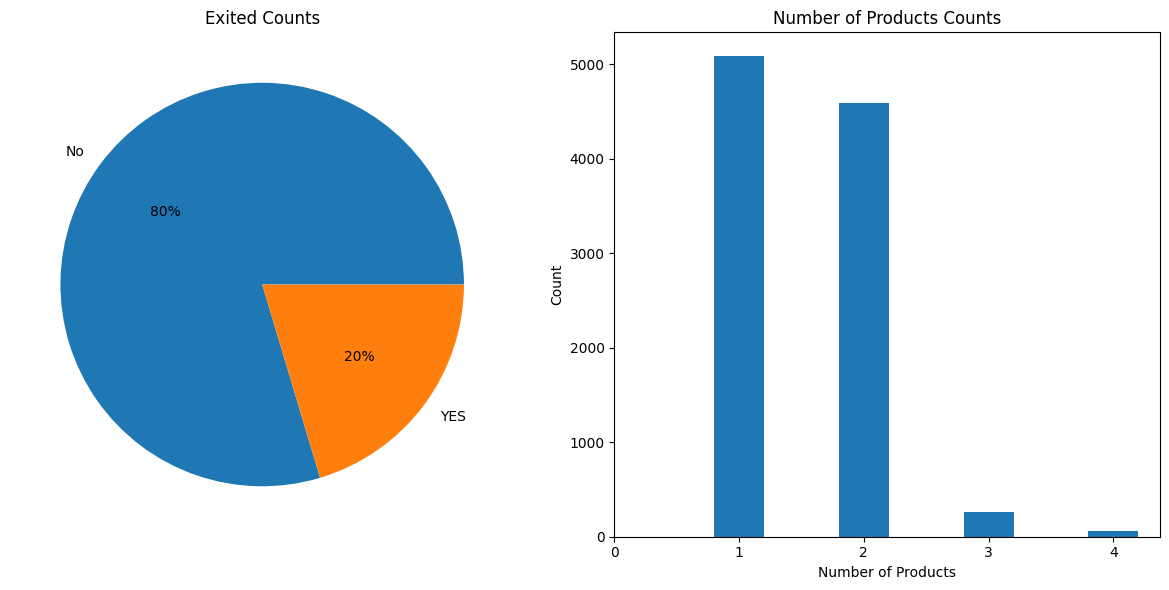

In [ ]:
# Calculate counts of unique values in the "Exited" and "NumOfProducts" columns
exit_counts = df["Exited"].value_counts()
num_counts = df["NumOfProducts"].value_counts()

# Create a pie chart for "Exited" counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("Exited Counts")

# Create a bar chart for "NumOfProducts" counts
plt.subplot(1, 2, 2)  # Subplot for the bar chart
plt.bar(num_counts.index, num_counts.values, width=0.4)
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.title("Number of Products Counts")
plt.xticks(np.arange(0,5,1))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
model.score(X_train, Y_train)

0.999875

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy2)

Validation Accuracy: 0.8635


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gen', 'Geo'],
      dtype='object')

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen,Geo
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [ ]:
df = pd.get_dummies(df,drop_first = True)
df.head()
df = df.astype(int)
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0,1,1,1,101348,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807,1,0,1,112542,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660,3,1,0,113931,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0,2,0,0,93826,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510,1,1,1,79084,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0,2,1,0,96270,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10,57369,1,1,1,101699,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7,0,1,0,1,42085,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3,75075,2,1,0,92888,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

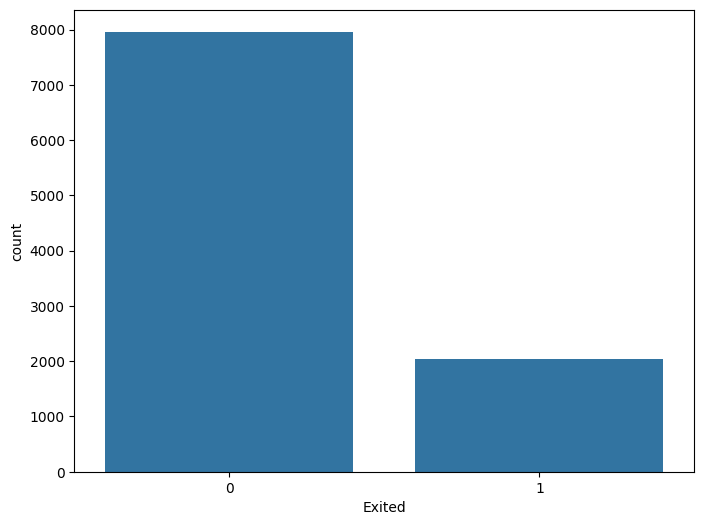

In [ ]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data= df)

In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited']
!pip install imblearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 2944)
Testing Shape:  (1000, 2944)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.03598539, -0.70255369, -0.47944328, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [-0.07553167,  0.4397324 ,  1.04580863, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-1.21543605,  1.5041205 , -0.85297437, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.13538186, -1.62883346,  0.86941896, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-1.4360627 ,  1.62241365,  0.16386025, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.78754869,  0.21247661,  0.47513615, ...,  1.73565068,
        -0.57700814,  0.91105005]])

## **Logistic Regression**

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)


LogisticRegression()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.772


### **Gradient Boosting Classifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.865
